In [34]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Oil Rates Data 

In [35]:
#Read Dataset and Get Inital few rows and Dataset dataType information
oilData = pd.read_csv('oil.csv')

print("Initial Oil Data Rows\n",oilData.head())

Initial Oil Data Rows
          date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20


In [36]:
print("Oil Data Info\n",oilData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB
Oil Data Info
 None


In [37]:
# Check for missing values
missing_values = oilData.isnull().sum()
has_nan = oilData.isnull().values.sum()


# Unique values in each column
unique_values = oilData.nunique()

In [38]:
print("Missing Values in Oil Data \n", missing_values)
print("\n\nNaN Values in Oil Data \n", has_nan)

Missing Values in Oil Data 
 date           0
dcoilwtico    43
dtype: int64


NaN Values in Oil Data 
 43


In [39]:
#Since we have some NaN/Missing values in Oil prices so lets view shows
rows_with_missing_values = oilData[oilData.isnull().any(axis=1)]
rows_with_missing_values

,date,dcoilwtico
0,2013-01-01,NaN
14,2013-01-21,NaN
34,2013-02-18,NaN
63,2013-03-29,NaN
104,2013-05-27,NaN
132,2013-07-04,NaN
174,2013-09-02,NaN
237,2013-11-28,NaN
256,2013-12-25,NaN
261,2014-01-01,NaN


In [40]:
# Function to calculate the average of the value before and after a missing value
def calculate_average_for_missing(oilData, row_index):
    if row_index > 0 and row_index < len(oilData) - 1:
        previous_value = oilData.at[row_index - 1, 'dcoilwtico']
        next_value = oilData.at[row_index + 1, 'dcoilwtico']
        if not pd.isnull(previous_value) and not pd.isnull(next_value):
            return round((previous_value + next_value) / 2, 2)
    return round(oilData['dcoilwtico'].mean(), 2)

In [41]:
averages = []
for idx in rows_with_missing_values.index:
    average_value = calculate_average_for_missing(oilData, idx)
    averages.append((oilData.loc[idx, 'date'], 'Missing/NaN', average_value))

In [42]:
print("Date \t\t Current Value \t Calculated Mean Value")
for item in averages:
    print(f"{item[0]} \t {item[1]} \t {item[2]}")

Date 		 Current Value 	 Calculated Mean Value
2013-01-01 	 Missing/NaN 	 67.71
2013-01-21 	 Missing/NaN 	 95.85
2013-02-18 	 Missing/NaN 	 96.32
2013-03-29 	 Missing/NaN 	 97.17
2013-05-27 	 Missing/NaN 	 94.24
2013-07-04 	 Missing/NaN 	 102.5
2013-09-02 	 Missing/NaN 	 108.32
2013-11-28 	 Missing/NaN 	 92.3
2013-12-25 	 Missing/NaN 	 99.02
2014-01-01 	 Missing/NaN 	 96.66
2014-01-20 	 Missing/NaN 	 94.24
2014-02-17 	 Missing/NaN 	 101.43
2014-04-18 	 Missing/NaN 	 104.34
2014-05-26 	 Missing/NaN 	 104.9
2014-07-04 	 Missing/NaN 	 104.48
2014-09-01 	 Missing/NaN 	 95.39
2014-11-27 	 Missing/NaN 	 69.82
2014-12-25 	 Missing/NaN 	 55.14
2015-01-01 	 Missing/NaN 	 53.08
2015-01-19 	 Missing/NaN 	 47.64
2015-02-16 	 Missing/NaN 	 53.11
2015-04-03 	 Missing/NaN 	 50.6
2015-05-25 	 Missing/NaN 	 58.08
2015-07-03 	 Missing/NaN 	 54.7
2015-09-07 	 Missing/NaN 	 45.97
2015-11-26 	 Missing/NaN 	 40.89
2015-12-25 	 Missing/NaN 	 36.99
2016-01-01 	 Missing/NaN 	 36.97
2016-01-18 	 Missing/NaN 	 28

In [43]:
#update the dataset with new calculated average values and preserve the old dataset
old_oil_dataset = oilData

for idx in oilData.index:
    if pd.isnull(oilData.at[idx, 'dcoilwtico']):
        oilData.at[idx, 'dcoilwtico'] = calculate_average_for_missing(oilData, idx)

new_oil_dataset = oilData

In [47]:
print("New Data set Details", new_oil_dataset.head())

# Check for missing values
missing_values = new_oil_dataset.isnull().sum()
has_nan = new_oil_dataset.isnull().values.sum()

print("\n\nMissing Values in Oil Data \n", missing_values)
print("\n\nNaN Values in Oil Data \n", has_nan)

New Data set Details          date  dcoilwtico
0  2013-01-01       67.71
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20


Missing Values in Oil Data 
 date          0
dcoilwtico    0
dtype: int64


NaN Values in Oil Data 
 0


In [48]:
print("New Oil Data Info\n",new_oil_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1218 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB
New Oil Data Info
 None


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/81/wffr_1x51057xcbrk0fqdd540000gn/T/ipykernel_67794/3907396914.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([''] * len(new_oil_dataset['date']))  # Hide x-label values


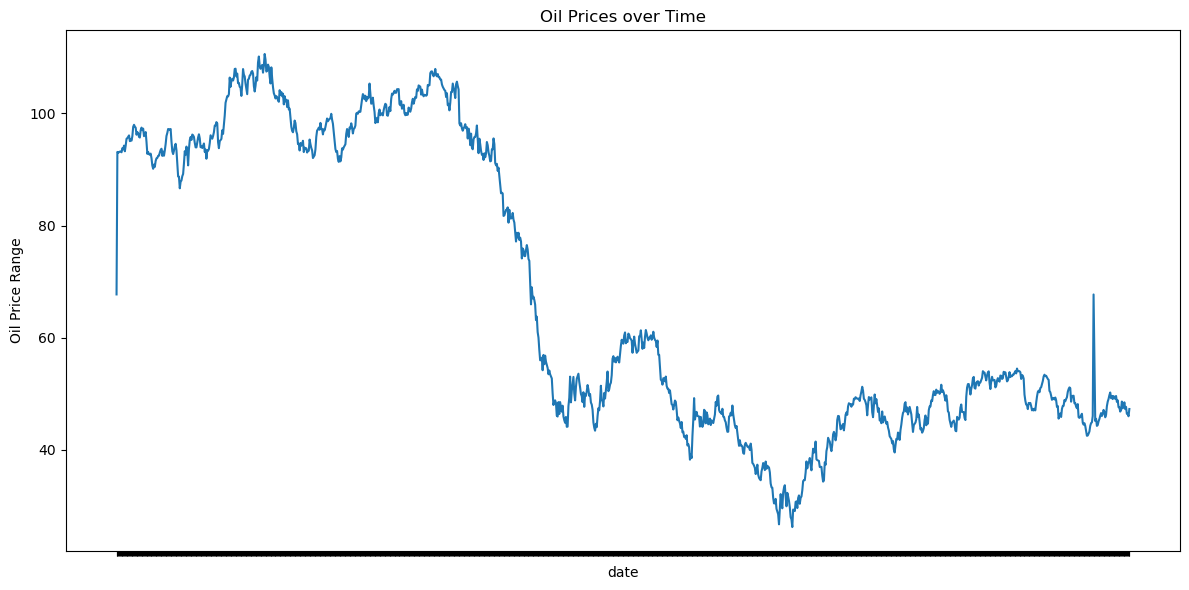

In [56]:
# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='dcoilwtico', data=new_oil_dataset)
plt.title('Oil Prices over Time')
plt.ylabel('Oil Price Range')
plt.xticks(rotation=45)
plt.gca().set_xticklabels([''] * len(new_oil_dataset['date']))
plt.tight_layout()
plt.show()

/var/folders/81/wffr_1x51057xcbrk0fqdd540000gn/T/ipykernel_67794/244850856.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([''] * len(new_oil_dataset['date']))  # Hide x-label values


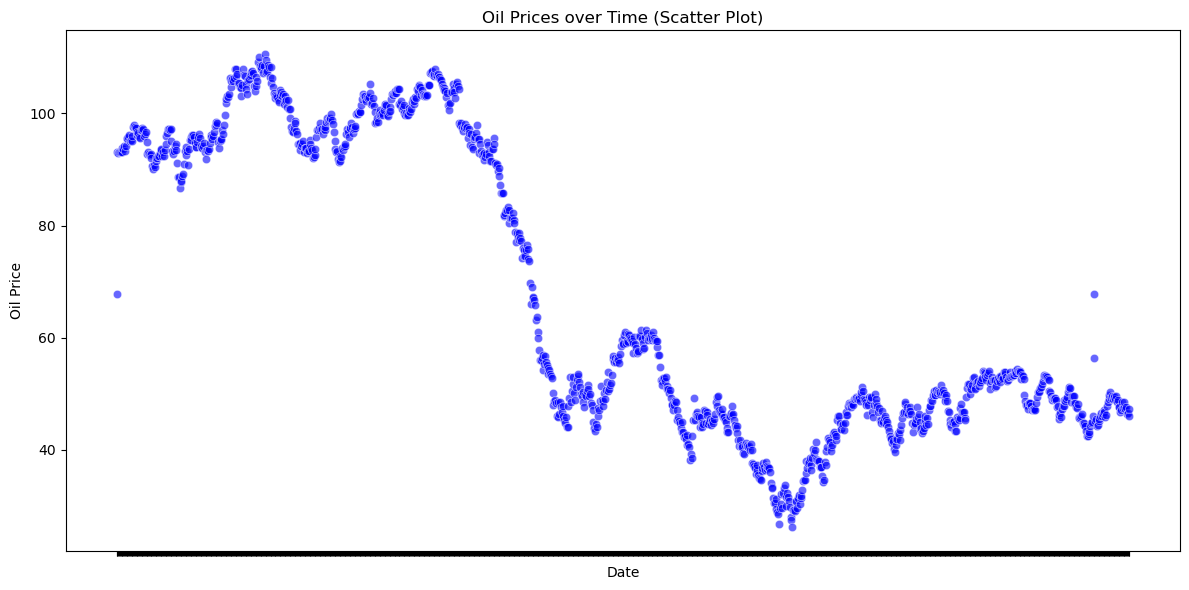

In [59]:
# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='date', y='dcoilwtico', data=new_oil_dataset, color='b', alpha=0.6)
plt.title('Oil Prices over Time (Scatter Plot)')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.xticks(rotation=45)
plt.gca().set_xticklabels([''] * len(new_oil_dataset['date']))  # Hide x-label values
plt.tight_layout()
plt.show()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


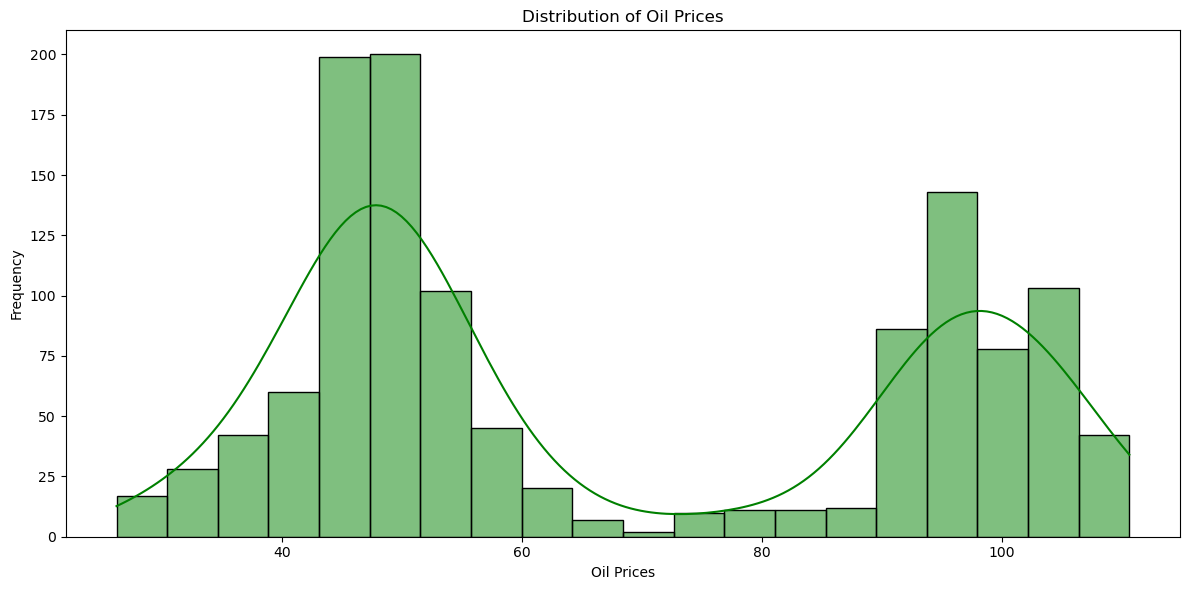

In [61]:
# Histogram with KDE
plt.figure(figsize=(12, 6))
sns.histplot(new_oil_dataset['dcoilwtico'], kde=True, bins=20, color='g')
plt.title('Distribution of Oil Prices')
plt.xlabel('Oil Prices')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [67]:
#Average Oil Prices
new_oil_dataset['date'] = pd.to_datetime(new_oil_dataset['date'])

# Extract year from 'date' column
new_oil_dataset['year'] = new_oil_dataset['date'].dt.year

# Group by year and calculate the mean oil price
average_oil_price_by_year = round(new_oil_dataset.groupby('year')['dcoilwtico'].mean(), 2).reset_index()

# Display the average oil price by year
print(average_oil_price_by_year)

   year  dcoilwtico
0  2013       97.87
1  2014       93.13
2  2015       48.67
3  2016       43.23
4  2017       49.47


In [69]:
new_oil_dataset['date'] = pd.to_datetime(new_oil_dataset['date'])

# Filter data for the specific year
yearly_data = new_oil_dataset[new_oil_dataset['date'].dt.year == 2017]

# Extract month from 'date' column
yearly_data['month'] = yearly_data['date'].dt.month

# Group by month and calculate the mean oil price
monthly_avg_price = yearly_data.groupby('month')['dcoilwtico'].mean().reset_index()

# Display the monthly average oil price
print(f"Monthly average oil prices for the year {2017}:\n", round(monthly_avg_price, 2))

Monthly average oil prices for the year 2017:
    month  dcoilwtico
0      1       52.52
1      2       53.48
2      3       49.33
3      4       51.15
4      5       48.53
5      6       45.18
6      7       48.10
7      8       48.04


/var/folders/81/wffr_1x51057xcbrk0fqdd540000gn/T/ipykernel_67794/2326922615.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['month'] = yearly_data['date'].dt.month


In [70]:
new_oil_dataset['date'] = pd.to_datetime(new_oil_dataset['date'])

# Filter data for the specific year
yearly_data = new_oil_dataset[new_oil_dataset['date'].dt.year == 2013]

# Extract month from 'date' column
yearly_data['month'] = yearly_data['date'].dt.month

# Group by month and calculate the mean oil price
monthly_avg_price = yearly_data.groupby('month')['dcoilwtico'].mean().reset_index()

# Display the monthly average oil price
print(f"Monthly average oil prices for the year {2013}:\n", round(monthly_avg_price, 2))

Monthly average oil prices for the year 2013:
     month  dcoilwtico
0       1       93.63
1       2       95.36
2       3       93.14
3       4       92.02
4       5       94.50
5       6       95.77
6       7      104.58
7       8      106.57
8       9      106.39
9      10      100.54
10     11       93.79
11     12       97.69


/var/folders/81/wffr_1x51057xcbrk0fqdd540000gn/T/ipykernel_67794/1784813926.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['month'] = yearly_data['date'].dt.month


In [71]:
new_oil_dataset['date'] = pd.to_datetime(new_oil_dataset['date'])

# Filter data for the specific year
yearly_data = new_oil_dataset[new_oil_dataset['date'].dt.year == 2014]

# Extract month from 'date' column
yearly_data['month'] = yearly_data['date'].dt.month

# Group by month and calculate the mean oil price
monthly_avg_price = yearly_data.groupby('month')['dcoilwtico'].mean().reset_index()

# Display the monthly average oil price
print(f"Monthly average oil prices for the year {2014}:\n", round(monthly_avg_price, 2))

Monthly average oil prices for the year 2014:
     month  dcoilwtico
0       1       94.69
1       2      100.85
2       3      100.80
3       4      102.17
4       5      102.30
5       6      105.79
6       7      103.63
7       8       96.54
8       9       93.31
9      10       84.40
10     11       75.49
11     12       59.11


/var/folders/81/wffr_1x51057xcbrk0fqdd540000gn/T/ipykernel_67794/2724362856.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['month'] = yearly_data['date'].dt.month


In [72]:
new_oil_dataset['date'] = pd.to_datetime(new_oil_dataset['date'])

# Filter data for the specific year
yearly_data = new_oil_dataset[new_oil_dataset['date'].dt.year == 2015]

# Extract month from 'date' column
yearly_data['month'] = yearly_data['date'].dt.month

# Group by month and calculate the mean oil price
monthly_avg_price = yearly_data.groupby('month')['dcoilwtico'].mean().reset_index()

# Display the monthly average oil price
print(f"Monthly average oil prices for the year {2015}:\n", round(monthly_avg_price, 2))

Monthly average oil prices for the year 2015:
     month  dcoilwtico
0       1       47.50
1       2       50.71
2       3       47.82
3       4       54.28
4       5       59.21
5       6       59.82
6       7       51.07
7       8       42.87
8       9       45.50
9      10       46.22
10     11       42.37
11     12       37.18


/var/folders/81/wffr_1x51057xcbrk0fqdd540000gn/T/ipykernel_67794/1144738537.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['month'] = yearly_data['date'].dt.month


In [76]:
new_oil_dataset['date'] = pd.to_datetime(new_oil_dataset['date'])

# Find the index of the highest and lowest values
max_index = new_oil_dataset['dcoilwtico'].idxmax()
min_index = new_oil_dataset['dcoilwtico'].idxmin()

# Extract the highest and lowest values and their corresponding dates
max_value = new_oil_dataset.loc[max_index, 'dcoilwtico']
max_date = new_oil_dataset.loc[max_index, 'date']
min_value = new_oil_dataset.loc[min_index, 'dcoilwtico']
min_date = new_oil_dataset.loc[min_index, 'date']

# Print the results
print(f"Highest Value of Oil in Dataset is {max_value} on {max_date.strftime('%Y-%m-%d')}")
print(f"Lowest Value of Oil in Dataset is {min_value} on {min_date.strftime('%Y-%m-%d')}")

Highest Value of Oil in Dataset is 110.62 on 2013-09-06
Lowest Value of Oil in Dataset is 26.19 on 2016-02-11


In [77]:
#Save cleaned dataset into new CSV file for ETL process
import os

os.makedirs('CleanData', exist_ok=True)
file_path = 'CleanData/new_oil_dataset.csv'
new_oil_dataset.to_csv(file_path, index=False)

print(f"Dataset saved to {file_path}")

,date,dcoilwtico,year
0,2013-01-01,67.71,2013
1,2013-01-02,93.14,2013
2,2013-01-03,92.97,2013
3,2013-01-04,93.12,2013
4,2013-01-07,93.20,2013
...,...,...,...
1213,2017-08-25,47.65,2017
1214,2017-08-28,46.40,2017
1215,2017-08-29,46.46,2017
1216,2017-08-30,45.96,2017
